In [278]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn import datasets as ds
from keras import datasets
import matplotlib.pyplot as plt
from warnings import filterwarnings
import tensorflow as tf
import time
filterwarnings("ignore")

In [189]:
(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

### regression

In [190]:
y_train.shape

(404,)

In [156]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

In [157]:
df = pd.DataFrame(X, columns=None)

In [158]:
df['result'] = y

<Figure size 3600x3600 with 0 Axes>

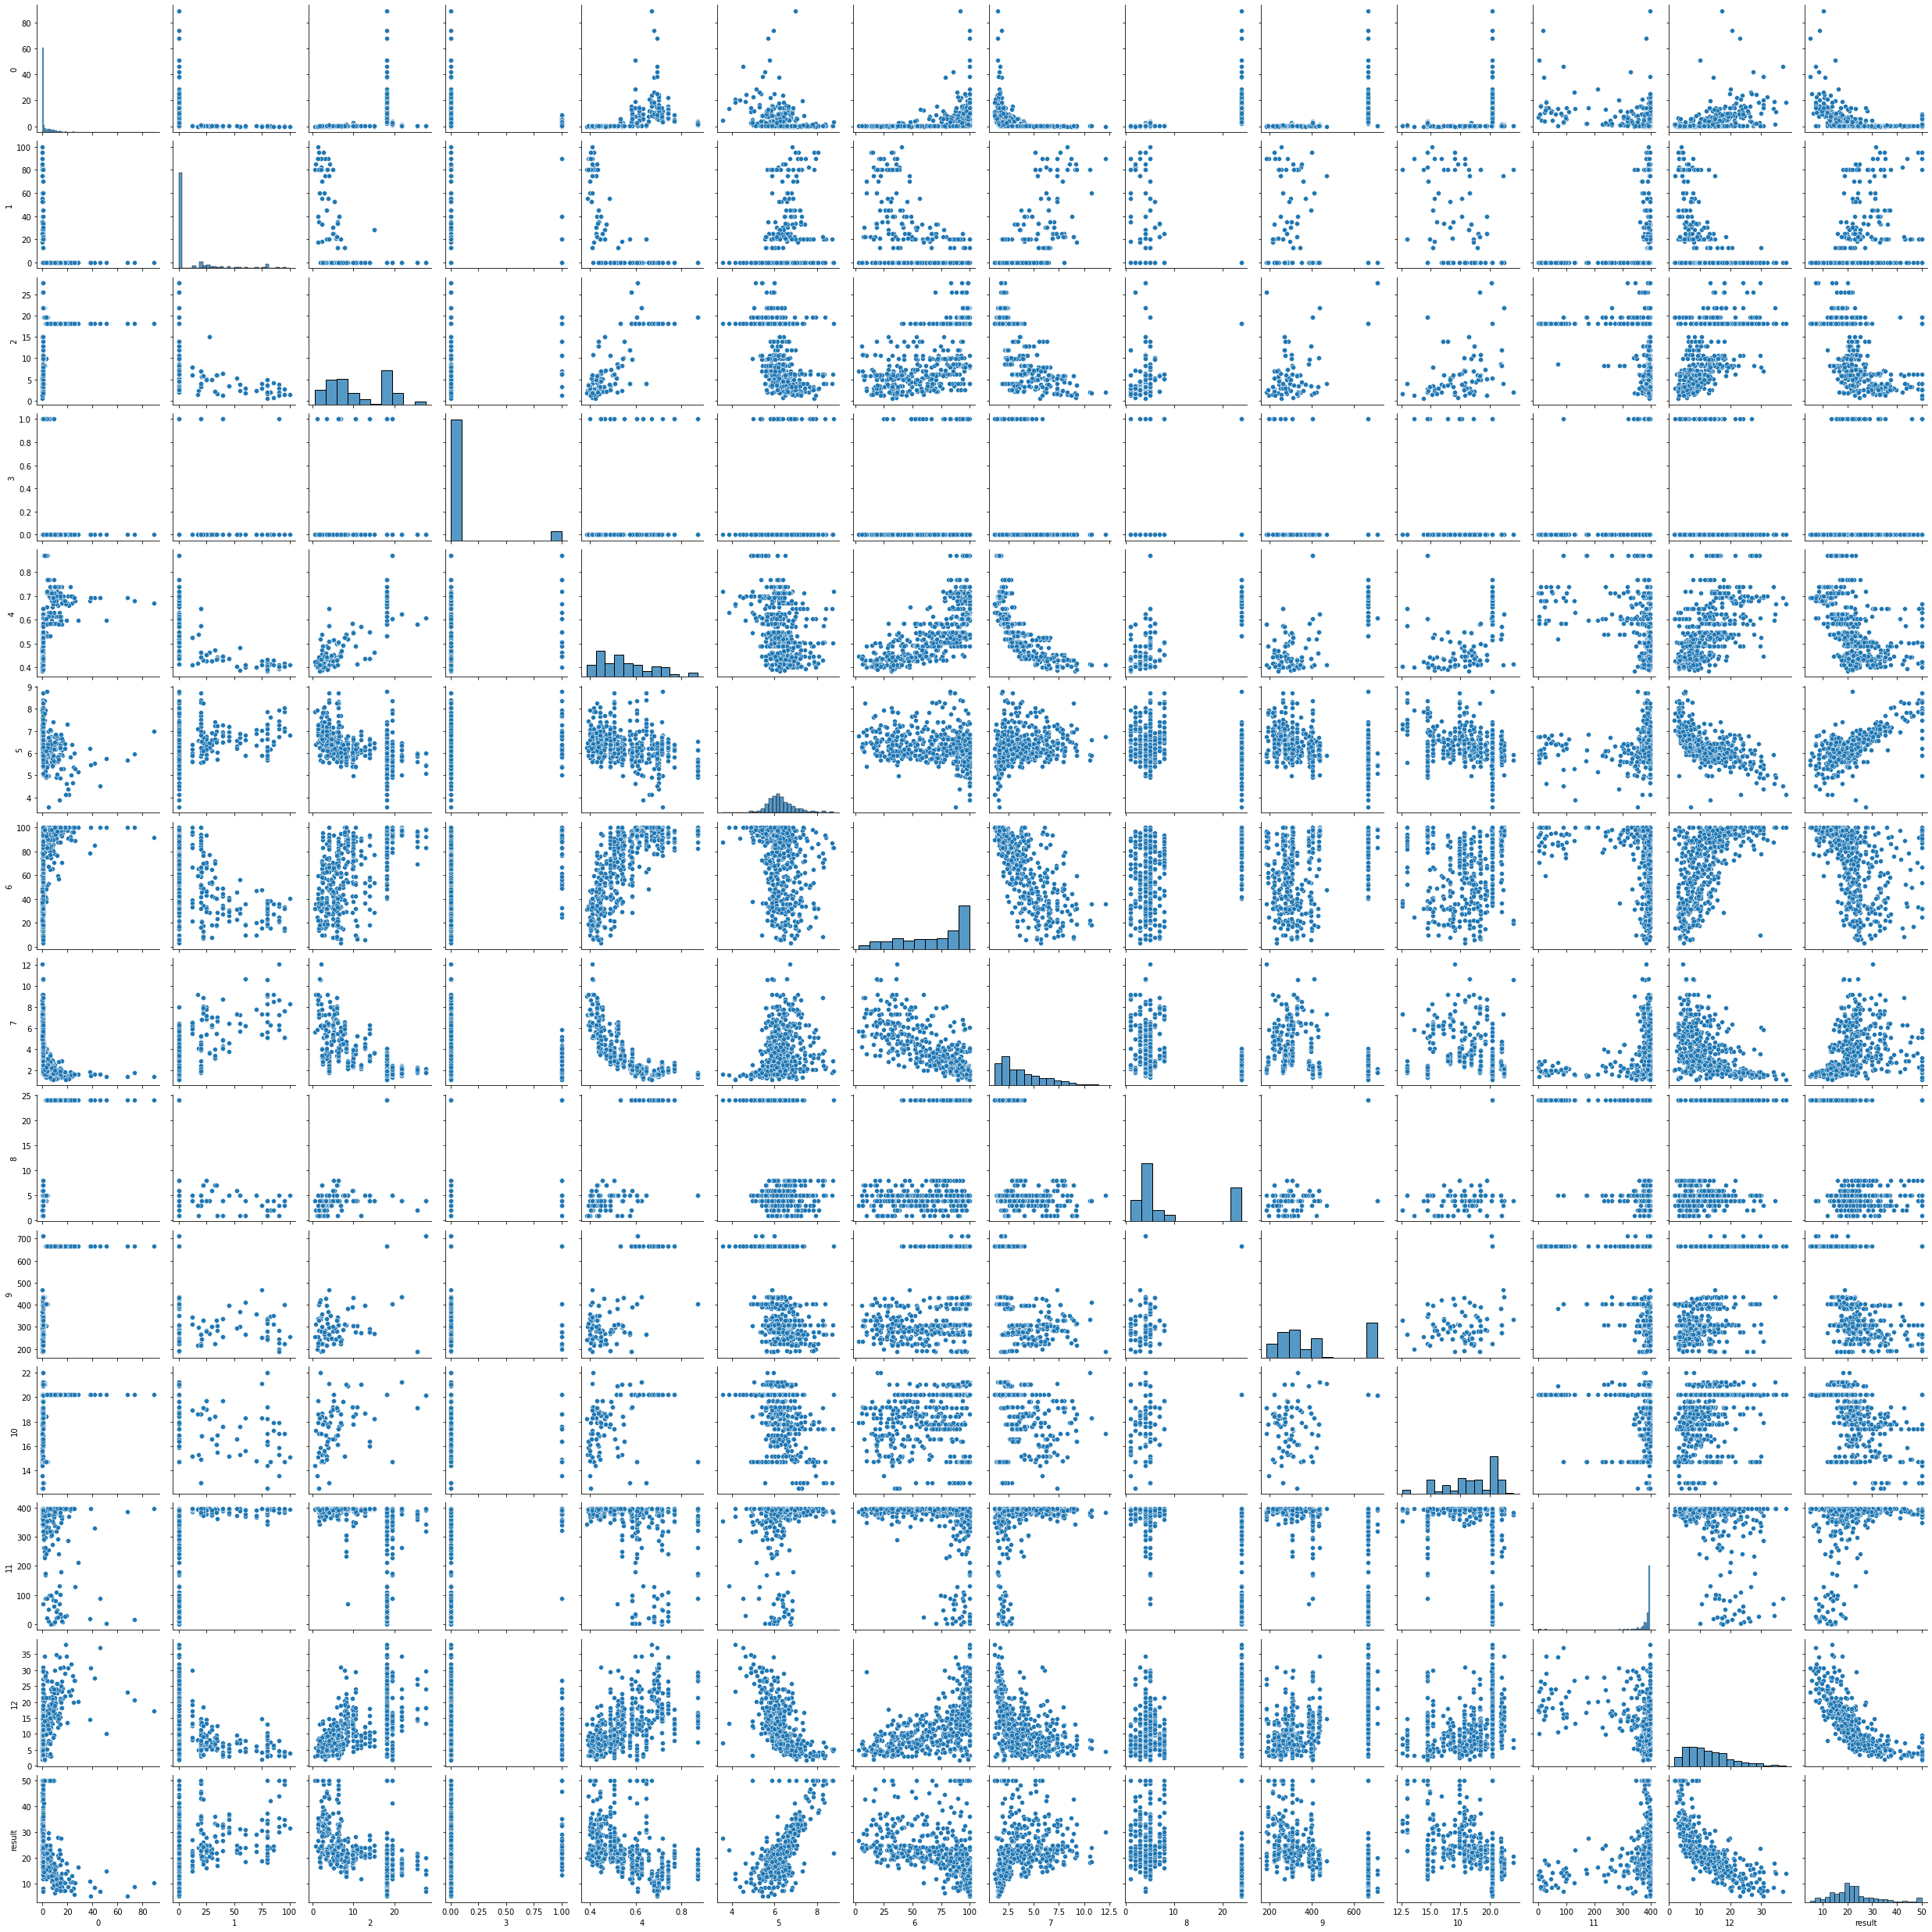

In [159]:
plt.figure(figsize=(50, 50))
sns.pairplot(df)

In [160]:
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [161]:
X_train.shape

(404, 13)

In [162]:
model = Sequential()
model.add(Dense(512, activation= "relu",input_shape=(13,)))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(1, activation= "linear"))

### adam optimizer 
- Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.
- Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
- Adam is relatively easy to configure where the default configuration parameters do well on most problems.

In [163]:
model.compile(optimizer= "adam", loss= keras.losses.mse)

In [164]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               7168      
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 42,113
Trainable params: 42,113
Non-trainable params: 0
_________________________________________________________________


In [169]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 13.8420
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 13.7391
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 12.7539
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 13.8861
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 22.3141
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 13.7520
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 11.9813
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 14.6459
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 13.2148
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 13.4220
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 12.7822
Epoch 12/100
13/13 [==============================] - ETA: 0s - loss: 18.44 - 0s 1ms/step - loss: 20.5582
E

In [170]:
pd.DataFrame(model.history.history)

,loss
0,13.842028
1,13.739065
2,12.753916
3,13.886093
4,22.314081
...,...
95,12.920762
96,11.812976
97,10.953259
98,11.510088


<AxesSubplot:>

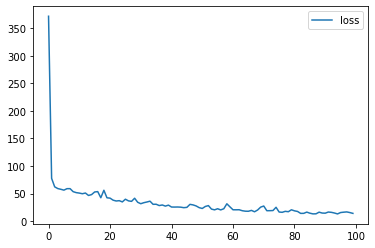

In [166]:
pd.DataFrame(model.history.history).plot()

#### Test 

In [167]:
model.evaluate(X_test, y_test, verbose=0)

32.10700988769531

In [168]:
model.evaluate(X_train, y_train, verbose=0)

12.220975875854492

In [171]:
predict = model.predict(X_test)

In [172]:
df_result = pd.DataFrame(y_test, columns=["True Y"])

In [173]:
df_result["Predicted Y"] = predict

In [174]:
df_result

,True Y,Predicted Y
0,7.2,10.274425
1,18.8,18.005871
2,19.0,21.493567
3,27.0,34.959686
4,22.2,22.749493
...,...,...
97,21.9,44.951469
98,24.1,25.412586
99,50.0,53.709274
100,26.7,28.381716


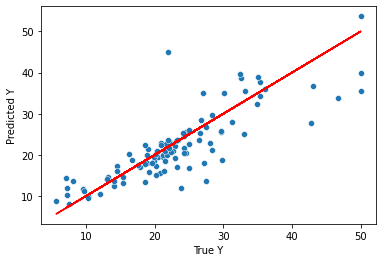

In [176]:
sns.scatterplot(x= "True Y", y= "Predicted Y", data= df_result)
plt.plot(df_result["True Y"], df_result["True Y"] , "r")

`this model is performing bad due to if it is good model it will give us straight line where each value on X-axis have the same value in Y-axis`

In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [178]:
mean_absolute_error(y_test, predict)

3.5010605737274774

`if you need to see if the given value for the loss is good or not you need to evaluate it related to the result value if it is far a way from the mean value of the resul column it will be great otherwise it will be bad`

In [179]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,result
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [181]:
(3.5 / 22.5) * 100 

15.555555555555555

`to evaluate it regarding to the mean square error you need to take the squar root for the output value and compair it with the mean of the result`

In [182]:
mean_squared_error(y_test, predict)

27.36650391391716

In [191]:
mean_squared_error(y_test, predict) ** 0.5

5.231300403715807

In [192]:
model.save("house_price_poor.h5")
new_model = tf.keras.models.load_model('house_price_poor.h5')


## new Example 

In [193]:
df = pd.read_csv("kc_house_data.csv")

In [194]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [195]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 720x1080 with 0 Axes>

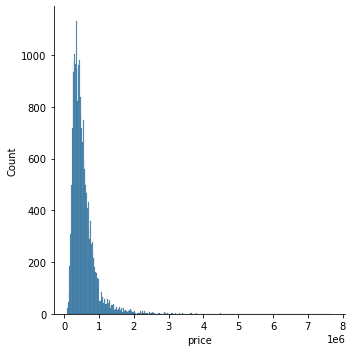

In [8]:
plt.figure(figsize=(10, 15))
sns.displot(df["price"]);

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


`the high correlation the high relation with this data and you need to compair it through visualization`

In [10]:
df.corr()["price"].sort_values(ascending= False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

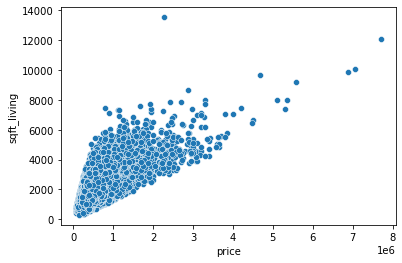

In [11]:
sns.scatterplot(x= "price", y= "sqft_living", data= df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

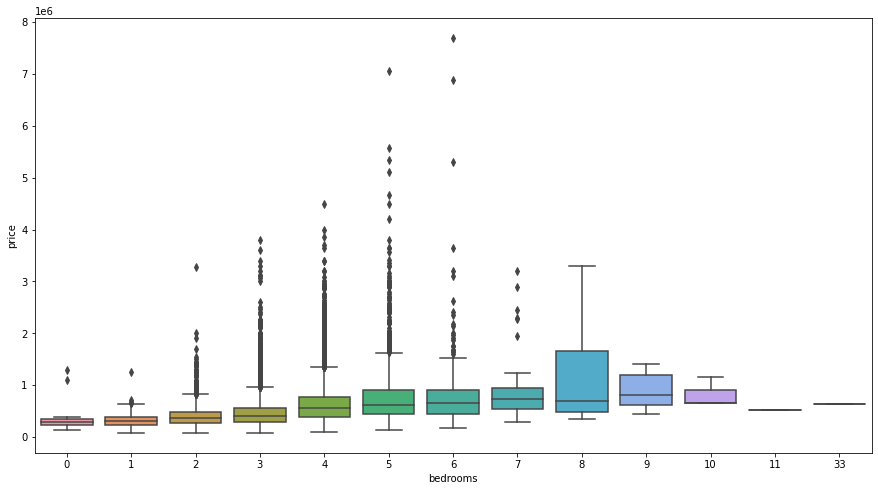

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(x= "bedrooms", y= "price", data=df)

<AxesSubplot:xlabel='long', ylabel='price'>

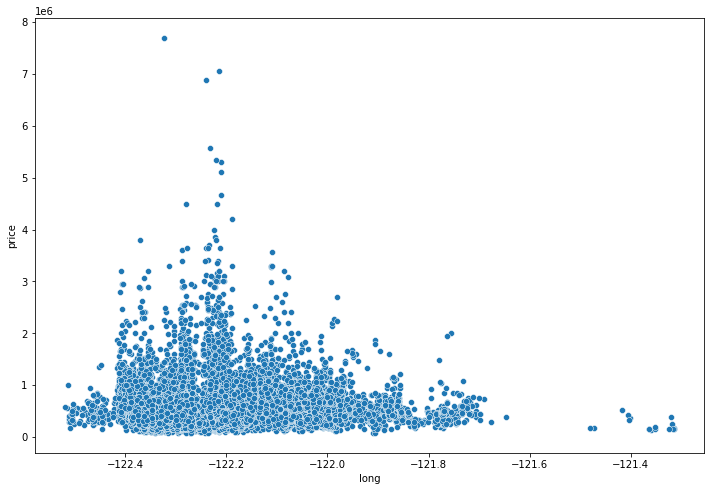

In [198]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x= "long", y= "price", data=df)

<AxesSubplot:xlabel='lat', ylabel='price'>

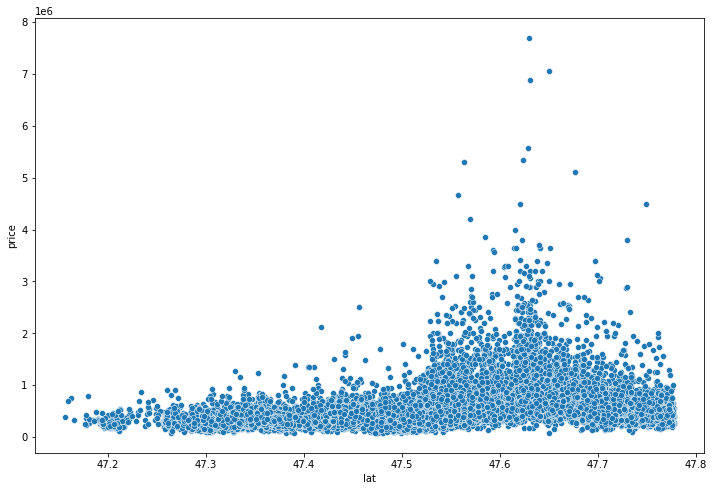

In [199]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x= "lat", y= "price", data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

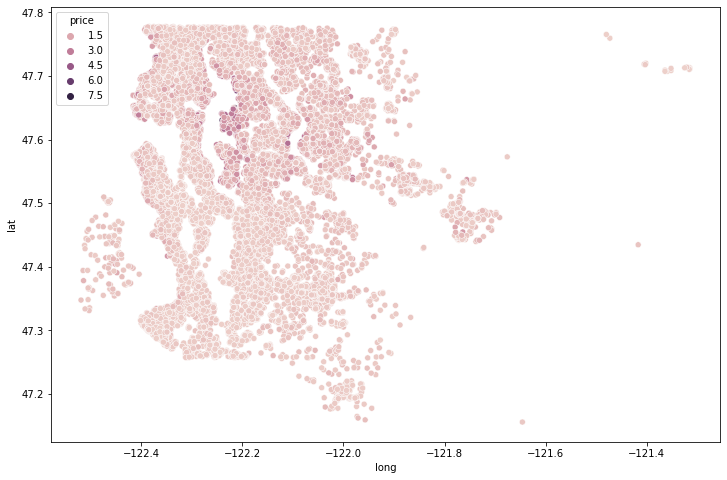

In [200]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x= "long", y= "lat", hue= "price", data=df)

`the grid color here is not the best so you need some updates as drop out the outlier data`

In [16]:
df.sort_values("price", ascending= False).head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788


`for better data visualization you need to take around 1% of the outlier data out the main df`

In [17]:
df.shape[0] *0.01

216.13

In [201]:
df_without_outliers = df.sort_values("price", ascending= False).iloc[216:,:]

<AxesSubplot:xlabel='long', ylabel='lat'>

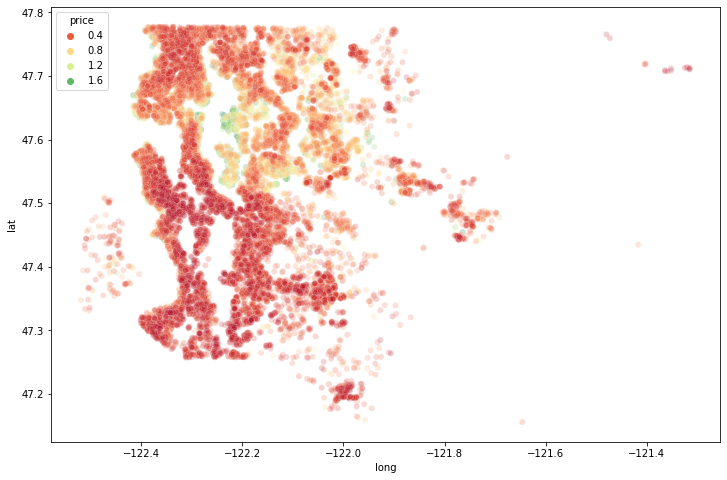

In [202]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x= "long", y= "lat", hue= "price",alpha= 0.2, palette= "RdYlGn", data= df_without_outliers)

In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

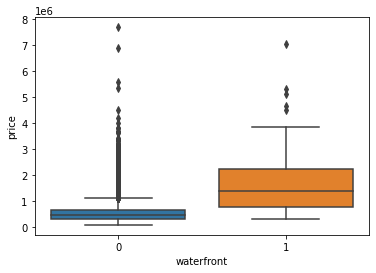

In [21]:
sns.boxplot(x= "waterfront", y = "price", data= df)

In [203]:
df.drop("id", axis=1, inplace=True)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [207]:
df["date"] = pd.to_datetime(df["date"])

In [208]:
# Feature engineering 
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)

In [209]:
df["year"]

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21613, dtype: int64

<AxesSubplot:xlabel='month', ylabel='price'>

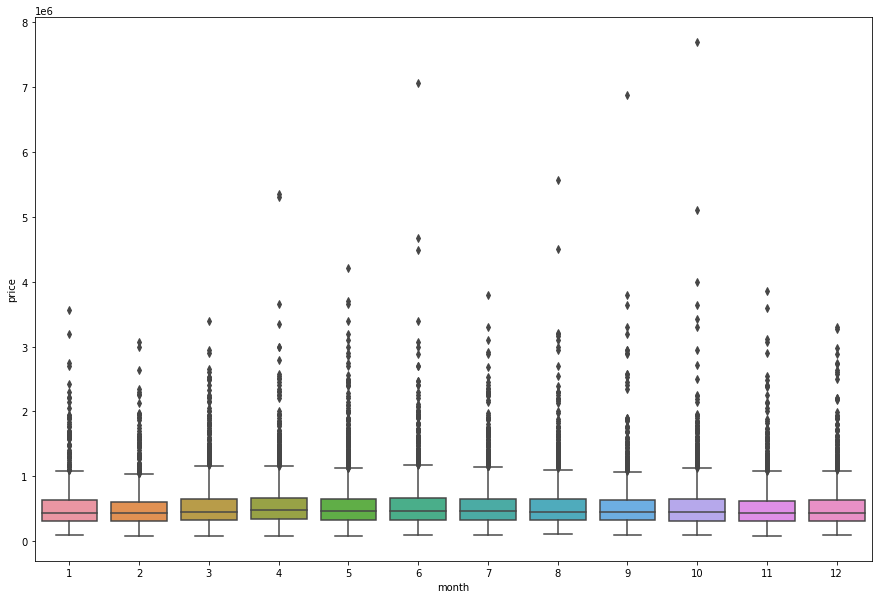

In [210]:
plt.figure(figsize=(15, 10))
sns.boxplot(x= "month", y= "price", data=df)

In [211]:
df.groupby("month").mean()["price"]

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

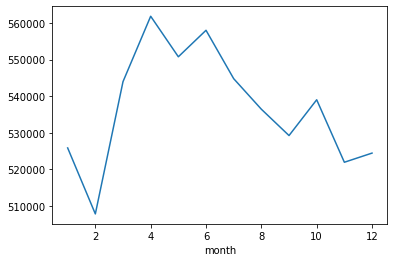

In [29]:
df.groupby("month").mean()["price"].plot()

<AxesSubplot:xlabel='year'>

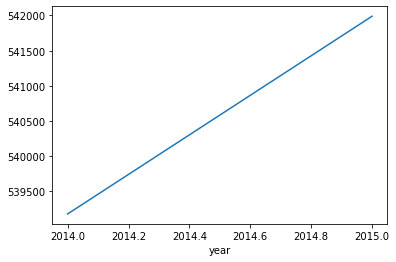

In [30]:
df.groupby("year").mean()["price"].plot()

In [213]:
df["zipcode"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

`there is 70 unique value for zipcode, it is to large to visualize and may be it has a high impact but it can be considered by the domain expert to define this on the map `

In [214]:
df.drop("zipcode", axis=1, inplace=True)

In [215]:
df["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [216]:
df["sqft_basement"].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [218]:
# Feature engineering
df["is_renovated"] = df["yr_renovated"].apply(lambda year:  year > 0 )
df["is_renovated"]

0        False
1         True
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Name: is_renovated, Length: 21613, dtype: bool

In [220]:
df[["is_renovated", "yr_renovated"]]

,is_renovated,yr_renovated
0,False,0
1,True,1991
2,False,0
3,False,0
4,False,0
...,...,...
21608,False,0
21609,False,0
21610,False,0
21611,False,0


In [221]:
df.drop("date", axis=1, inplace= True)

In [222]:
X = df.drop("price", axis=1).values
y = df["price"].values

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [225]:
X_train.shape, X_test.shape

((15129, 20), (6484, 20))

In [228]:
from sklearn.preprocessing import MinMaxScaler

In [229]:
scaler = MinMaxScaler()

In [230]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [268]:
model = Sequential()

model.add(Dense(19, input_shape=(20,), activation= "relu"))
model.add(Dense(19, activation= "relu"))
model.add(Dense(19, activation= "relu"))
model.add(Dense(19, activation= "relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss= "mse")

In [269]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 19)                399       
                                                                 
 dense_20 (Dense)            (None, 19)                380       
                                                                 
 dense_21 (Dense)            (None, 19)                380       
                                                                 
 dense_22 (Dense)            (None, 19)                380       
                                                                 
 dense_23 (Dense)            (None, 1)                 20        
                                                                 
Total params: 1,559
Trainable params: 1,559
Non-trainable params: 0
_________________________________________________________________


`the smaller the batch size is the more likely to get overfitting `

In [270]:
model.fit(x= X_train, y= y_train, 
          #validation_data=(X_validate, y_validate),
          validation_data=(X_test, y_test),
          batch_size= 128, epochs= 500
         )

Epoch 1/500
119/119 [==============================] - 0s 2ms/step - loss: 423607861248.0000 - val_loss: 432917610496.0000
Epoch 2/500
119/119 [==============================] - 0s 1ms/step - loss: 420934221824.0000 - val_loss: 423781793792.0000
Epoch 3/500
119/119 [==============================] - 0s 1ms/step - loss: 383606521856.0000 - val_loss: 343233298432.0000
Epoch 4/500
119/119 [==============================] - 0s 1ms/step - loss: 238209318912.0000 - val_loss: 157195550720.0000
Epoch 5/500
119/119 [==============================] - 0s 1ms/step - loss: 109682442240.0000 - val_loss: 101760876544.0000
Epoch 6/500
119/119 [==============================] - 0s 1ms/step - loss: 97247633408.0000 - val_loss: 99248308224.0000
Epoch 7/500
119/119 [==============================] - 0s 1ms/step - loss: 95598616576.0000 - val_loss: 96948445184.0000
Epoch 8/500
119/119 [==============================] - 0s 1ms/step - loss: 93912121344.0000 - val_loss: 94958419968.0000
Epoch 9/500
119/119 [=

<AxesSubplot:>

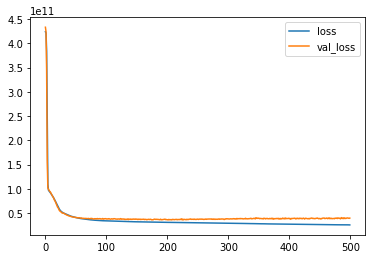

In [271]:
pd.DataFrame(model.history.history).plot()

`because of the validation value is comming down also this mean that there is no overfitting and we can complete training`

In [272]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [258]:
prediction = model.predict(X_test)

In [259]:
mean_squared_error(y_test, prediction) ** 0.5

195474.9350928645

In [260]:
mean_absolute_error(y_test, prediction)

127770.38806581586

`is this good or bad the value of the error we need to take a look at the prices and taking in the account the values of the price `

In [261]:
df["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [262]:
( 195136.43859725975 / 5.400881e+05) * 100

36.13048289663478

`the error here is around 20% of the mean of the price which is not good at all and you can explain it more by visualization as given below`

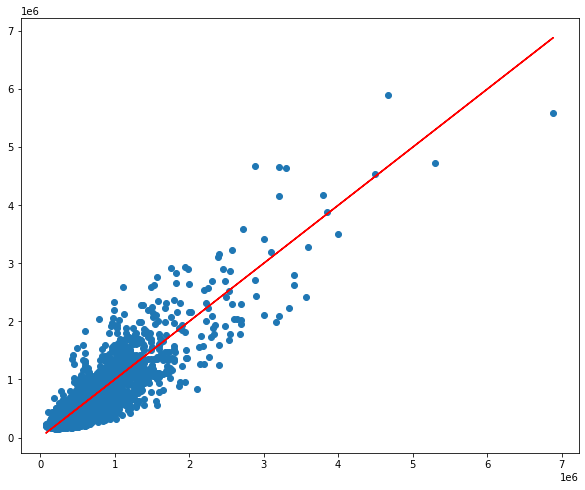

In [263]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, "r")

In [251]:
single_house = df.drop("price", axis=1).iloc[0]
single_house = single_house.values.reshape(-1, 20)

In [252]:
scaler_house =  scaler.transform(single_house)
model.predict(scaler_house)

array([[204504.66]], dtype=float32)

In [78]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,is_renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,False


In [79]:
195430.97 - 221900.0

-26469.03

## Cancer Classification

In [283]:
df = pd.read_csv("cancer_classification.csv")

In [284]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Explainatroy Data Analysis

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

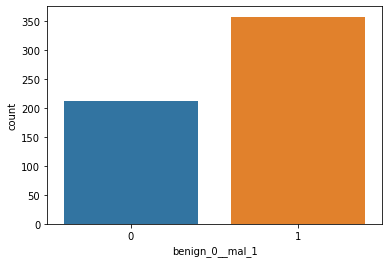

In [285]:
sns.countplot("benign_0__mal_1",data= df)

<AxesSubplot:>

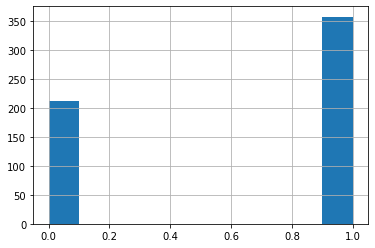

In [286]:
df['benign_0__mal_1'].hist()

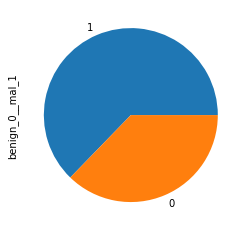

In [287]:
df["benign_0__mal_1"].value_counts().plot.pie();

In [288]:
df["benign_0__mal_1"].value_counts() / 569 * 100

# df.shape[0]

1    62.741652
0    37.258348
Name: benign_0__mal_1, dtype: float64

In [289]:
df.corr()["benign_0__mal_1"].sort_values(ascending= False)

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<AxesSubplot:>

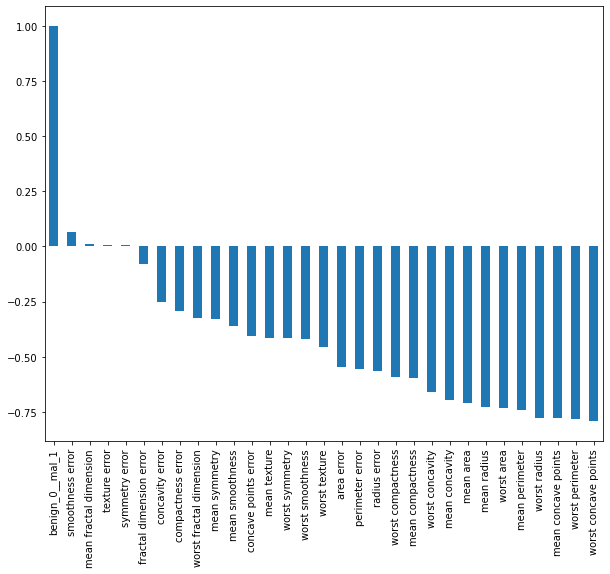

In [290]:
plt.figure(figsize=(10, 8))
df.corr()["benign_0__mal_1"].sort_values(ascending= False).plot(kind="bar")

<AxesSubplot:>

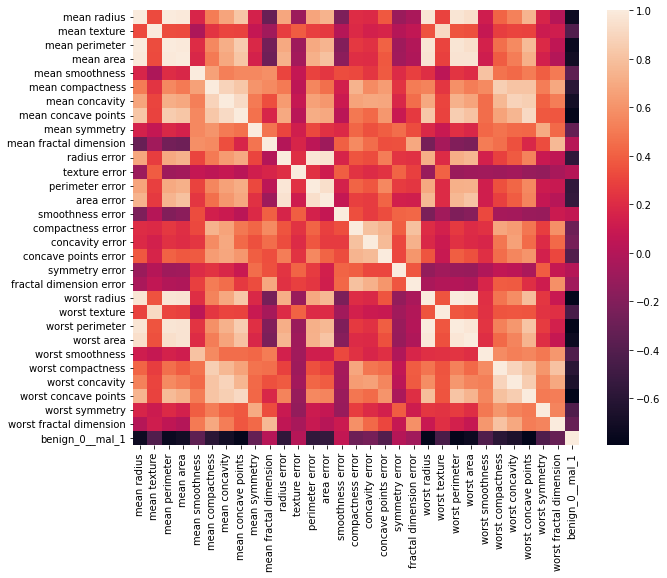

In [291]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())

In [292]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df["benign_0__mal_1"].values

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [294]:
scaler = MinMaxScaler()
_x_trained = X_train
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

#### what is the benefit of scaling data every time is it mandatory  step ?
- [MinMaxScaler](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)  
``

In [295]:
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
# where min, max = feature_range.


### Dealing with overfitting 

In [296]:
from tensorflow.keras.layers import Dropout

In [297]:
X_train.shape

(426, 30)

In [301]:
model = Sequential()

model.add(Dense(30, activation="relu"))

model.add(Dense(15, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss= tf.keras.losses.binary_crossentropy, optimizer= "adam")

In [302]:
model.fit(x= X_train, y= y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
14/14 [==============================] - 1s 13ms/step - loss: 0.6694 - val_loss: 67.6093
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6239 - val_loss: 92.2116
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5804 - val_loss: 122.2700
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5348 - val_loss: 163.2041
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4854 - val_loss: 210.9239
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4357 - val_loss: 262.9171
Epoch 7/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3859 - val_loss: 320.1300
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3438 - val_loss: 373.4680
Epoch 9/500
14/14 [==============================] - 0s 6ms/step - loss: 0.3081 - val_loss: 416.0898
Epoch 10/500
14/14 [==============================] - 0s 6ms/step - loss: 0.2779 - val_loss:

<AxesSubplot:>

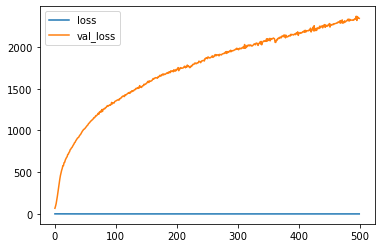

In [303]:
pd.DataFrame(model.history.history).plot()

`this the best example of overfitting where the validation error is increased after a while, where we trained so much we need to add early stopping process we can solve this by callback function to early stop the training at spacific point which minimize the error`

In [304]:
from tensorflow.keras.callbacks import EarlyStopping

In [305]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [306]:
early_stop = EarlyStopping(monitor="val_loss", mode= "min", verbose= 1, patience= 25)

`mode is based on the metrice that you used if you are measuring the accurcy you need the max value for it, if you measure the loss you need tom minimize it and so on `
- the **verbose** here is refer to the number of reporting lines that we get back 
- the **patience** is the number of epochs run after getting the best fit value, this will help you if you have noise in the data 

In [307]:
model = Sequential()

model.add(Dense(30, activation="relu"))

model.add(Dense(15, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss= tf.keras.losses.binary_crossentropy, optimizer= "adam")

model.fit(x= X_train, y= y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 0s 8ms/step - loss: 0.6658 - val_loss: 101.5179
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6270 - val_loss: 113.3411


In [308]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.665753,101.517921
1,0.627024,113.341103
